In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
import xgboost

In [2]:
#pip install -U scikit-learn

In [3]:
#pip install delayed

In [2]:
!rm -r /content/LightGBM
!git clone --recursive https://github.com/Microsoft/LightGBM
%cd /content/LightGBM
!mkdir build
!cmake -DUSE_GPU=1 #avoid ..
!make -j$(nproc)
!sudo apt-get -y install python-pip
!sudo -H pip install setuptools pandas numpy scipy scikit-learn -U
%cd /content/LightGBM/python-package
!sudo python setup.py install --precompile

Cloning into 'LightGBM'...
^C
[Errno 2] No such file or directory: '/content/LightGBM'
/content
CMake Error: The source directory "/content" does not appear to contain CMakeLists.txt.
Specify --help for usage, or press the help button on the CMake GUI.
make: *** No targets specified and no makefile found.  Stop.
^C
Requirement already up-to-date: setuptools in /usr/local/lib/python3.6/dist-packages (53.0.0)
Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.1.5)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.19.5)
Requirement already up-to-date: scipy in /usr/local/lib/python3.6/dist-packages (1.5.4)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.24.1)
[Errno 2] No such file or directory: '/content/LightGBM/python-package'
/content
python3: can't open file 'setup.py': [Errno 2] No such file or directory


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data_dir  = "/content/drive/MyDrive/M2/U4_Prediction_stock_auction_volumes/dataset"

In [3]:
data_list = glob.glob(os.path.join(data_dir, '**.csv'))
data_list

['/content/drive/MyDrive/M2/U4_Prediction_stock_auction_volumes/dataset/x_train.csv',
 '/content/drive/MyDrive/M2/U4_Prediction_stock_auction_volumes/dataset/x_test.csv',
 '/content/drive/MyDrive/M2/U4_Prediction_stock_auction_volumes/dataset/submission_csv_file_random_example.csv',
 '/content/drive/MyDrive/M2/U4_Prediction_stock_auction_volumes/dataset/y_train.csv']

In [4]:
id_col = 'ID'
target_col = "target"

In [5]:
y_train = pd.read_csv("%s/y_train.csv" % data_dir, sep=",")
x_train = pd.read_csv("%s/x_train.csv" % data_dir, sep=",")
x_test=pd.read_csv("%s/x_test.csv" % data_dir, sep=",")

In [6]:
return_cols = [c for c in train_df.columns if c.startswith("abs_ret")]
volume_cols = [c for c in train_df.columns if c.startswith("rel_vol")]
date_col = ["day"]
prod_id_col=["pid"]
other_cols = ["LS" , "NLV"]

NameError: ignored

In [ ]:
# Let's analyze stock number 1
stock_1 = train_df.loc[train_df['pid'] == 1]
stock_1

In [ ]:
stock_1.info()

In [15]:
#stock_1.loc[:, 'day'] = pd.to_datetime(stock_1.loc[:,'day'], format="%Y/%m/%d")

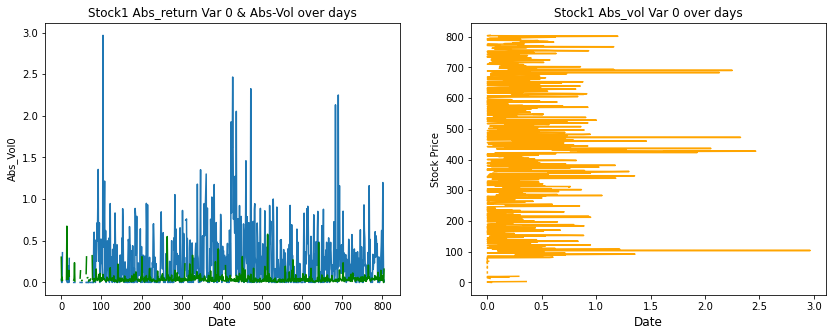

In [16]:
# Simple plotting of Stock1
# First Subplot
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(stock_1["day"], stock_1["abs_ret0"])
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Abs_ret")
ax1.set_title("Stock1 Abs_return Var 0 & Abs-Vol over days")
# Second Subplot
ax1.plot(stock_1["day"], stock_1["rel_vol0"], color="green")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Abs_Vol0")
ax1.set_title("Stock1 Abs_return Var 0 & Abs-Vol over days")

# Fourth Subplot
ax2.plot(stock_1["abs_ret0"], stock_1["day"], color="orange")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Stock Price")
ax2.set_title("Stock1 Abs_vol Var 0 over days")
plt.show()


Var during one day of return & Vol

2 sol : index with time vector or long format

In [17]:
l = [i for i in range(60)]

In [18]:
# Let's analyze stock number 1
stock_1_day1 = stock_1.loc[stock_1['day'] == 0]
stock_1_day1

,ID,target,pid,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,abs_ret7,abs_ret8,abs_ret9,abs_ret10,abs_ret11,abs_ret12,abs_ret13,abs_ret14,abs_ret15,abs_ret16,abs_ret17,abs_ret18,abs_ret19,abs_ret20,abs_ret21,abs_ret22,abs_ret23,abs_ret24,abs_ret25,abs_ret26,abs_ret27,abs_ret28,abs_ret29,abs_ret30,abs_ret31,abs_ret32,abs_ret33,abs_ret34,abs_ret35,...,rel_vol23,rel_vol24,rel_vol25,rel_vol26,rel_vol27,rel_vol28,rel_vol29,rel_vol30,rel_vol31,rel_vol32,rel_vol33,rel_vol34,rel_vol35,rel_vol36,rel_vol37,rel_vol38,rel_vol39,rel_vol40,rel_vol41,rel_vol42,rel_vol43,rel_vol44,rel_vol45,rel_vol46,rel_vol47,rel_vol48,rel_vol49,rel_vol50,rel_vol51,rel_vol52,rel_vol53,rel_vol54,rel_vol55,rel_vol56,rel_vol57,rel_vol58,rel_vol59,rel_vol60,LS,NLV
73368,145244,-2.122217,1,0,0.037272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.075038,0.075,0.0,0.0,0.0,0.0,NaN,0.0,...,0.002679,NaN,0.000054,0.000161,NaN,0.008442,0.043169,0.02443,0.010725,0.005363,0.032688,NaN,0.005359,0.00268,0.013693,0.002706,0.000161,NaN,0.000402,0.007904,0.008038,0.002729,0.013861,0.012056,0.000107,0.018766,0.005354,0.00273,0.000134,0.002518,0.005387,0.005473,0.021898,0.050932,0.005442,0.040114,0.021456,0.005418,-1.986009,-0.851069


In [19]:
#f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
#ax1.plot(l, stock_1["abs_ret0"])
#ax1.set_xlabel("Date", fontsize=12)
#ax1.set_ylabel("Abs_ret")
#ax1.set_title("Stock1 Abs_return Var 0 & Abs-Vol over days")

Quick strating kit

In [20]:
train_df.isnull().sum(axis=1)

0         0
1         0
2         2
3         0
4         0
         ..
684477    8
684478    4
684479    6
684480    2
684481    0
Length: 684482, dtype: int64

In [21]:
x_test.isnull().sum(axis=1)

0          0
1          0
2          0
3          0
4          0
          ..
311739     0
311740    38
311741     0
311742     0
311743     2
Length: 311744, dtype: int64

Interpoloate nan

In [22]:
#x_train.iloc[:,3:] = x_train.iloc[:,3:].interpolate(axis=1)
#x_test.iloc[:,3:]  = x_test.iloc[:,3:].interpolate(axis=1)

In [23]:
x_test.isnull().sum(axis=1)

0          0
1          0
2          0
3          0
4          0
          ..
311739     0
311740    38
311741     0
311742     0
311743     2
Length: 311744, dtype: int64

In [24]:
np.any(np.isnan(x_train))

True

In [25]:
np.all(np.isfinite(x_train))

False

In [7]:
x_train.fillna(0, inplace=True) 
x_test.fillna(0, inplace=True)

## Feature engineering

Create basic feature

In [8]:
x_train['min_ret']    = np.min(x_train.iloc[:,3:63], axis=1)
x_train['max_ret']    = np.max(x_train.iloc[:,3:63], axis=1)
x_train['std_ret']    = np.std(x_train.iloc[:,3:63], axis=1)
x_train['median_ret'] = np.median(x_train.iloc[:,3:63], axis=1)

In [9]:
x_test['min_ret']    = np.min(x_test.iloc[:,3:63], axis=1)
x_test['max_ret']    = np.max(x_test.iloc[:,3:63], axis=1)
x_test['std_ret']    = np.std(x_test.iloc[:,3:63], axis=1)
x_test['median_ret'] = np.median(x_test.iloc[:,3:63], axis=1)

In [10]:
x_train['min_vol']    = np.min(x_train.iloc[:,64:125], axis=1)
x_train['max_vol']    = np.max(x_train.iloc[:,64:125], axis=1)
x_train['std_vol']    = np.std(x_train.iloc[:,64:125], axis=1)
x_train['median_vol'] = np.median(x_train.iloc[:,64:125], axis=1)

In [11]:
x_test['min_vol']    = np.min(x_test.iloc[:,64:125], axis=1)
x_test['max_vol']    = np.max(x_test.iloc[:,64:125], axis=1)
x_test['std_vol']    = np.std(x_test.iloc[:,64:125], axis=1)
x_test['median_vol'] = np.median(x_test.iloc[:,64:125], axis=1)

Convert pid (categorical variable) into dummies. 
How to deal with dates ? 

In [12]:
x_train=pd.get_dummies(x_train,columns=['pid'])
x_test=pd.get_dummies(x_test,columns=['pid'])


In [13]:
for f in x_train.columns[134:1034]:
  x_train[f]=x_train[f].astype('category')

In [14]:
for f in x_test.columns[134:1034]:
  x_test[f]=x_test[f].astype('category')

In [34]:
#x_train['pid'] = x_train['pid'].astype('category')
#x_test['pid'] = x_test['pid'].astype('category')

In [35]:

#x_test['pid'] = pd.Series(x_test['pid'], dtype="category")

Validation

In [16]:
from sklearn.model_selection import train_test_split

train_df  = y_train.merge(x_train, on="ID")
train_df.drop(['ID'], axis=1, inplace=True)

In [17]:
train_X_, test_X_, train_y_, test_y_ = train_test_split(train_df.iloc[:,1:134], train_df['target'], test_size=0.2, random_state=42)

In [18]:
import delayed

In [19]:
train_y_

326229   -1.114191
592713   -2.251367
29576    -2.660391
247853   -2.159305
201180   -2.092106
            ...   
259178   -1.755555
365838   -1.000992
131932   -1.244468
671155   -2.349228
121958   -1.643299
Name: target, Length: 547585, dtype: float64

In [20]:
from sklearn.linear_model import LinearRegression

regrLinWeighted = LinearRegression()
regrLinWeighted.fit(train_X_, train_y_)

LinearRegression()

In [20]:
test_X_

,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,abs_ret7,abs_ret8,abs_ret9,abs_ret10,abs_ret11,abs_ret12,abs_ret13,abs_ret14,abs_ret15,abs_ret16,abs_ret17,abs_ret18,abs_ret19,abs_ret20,abs_ret21,abs_ret22,abs_ret23,abs_ret24,abs_ret25,abs_ret26,abs_ret27,abs_ret28,abs_ret29,abs_ret30,abs_ret31,abs_ret32,abs_ret33,abs_ret34,abs_ret35,abs_ret36,abs_ret37,abs_ret38,...,rel_vol31,rel_vol32,rel_vol33,rel_vol34,rel_vol35,rel_vol36,rel_vol37,rel_vol38,rel_vol39,rel_vol40,rel_vol41,rel_vol42,rel_vol43,rel_vol44,rel_vol45,rel_vol46,rel_vol47,rel_vol48,rel_vol49,rel_vol50,rel_vol51,rel_vol52,rel_vol53,rel_vol54,rel_vol55,rel_vol56,rel_vol57,rel_vol58,rel_vol59,rel_vol60,LS,NLV,min_ret,max_ret,std_ret,median_ret,min_vol,max_vol,std_vol,median_vol
99589,41,0.000000,0.000000,0.327869,0.000000,0.000000,0.000000,0.000000,0.072464,0.018067,0.036114,0.000000,0.000000,0.000000,0.323625,0.018060,0.000000,0.000000,0.036101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036036,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071891,0.000000,0.000000,...,0.000563,0.007349,0.009277,0.018154,0.007362,0.044222,0.010593,0.009420,0.005716,0.008562,0.095894,0.004931,0.005191,0.006736,0.007368,0.014367,0.029503,0.002459,0.007550,0.000000,0.002459,0.004949,0.002456,0.029123,0.004928,0.002464,0.002468,0.000518,0.002832,0.012310,-2.903046,-1.453430,0.0,0.327869,0.061653,0.000000,0.000000,0.095894,0.020351,0.007550
535740,587,0.479781,0.205128,0.000000,0.306748,0.119760,0.034165,0.136565,0.034072,0.068236,0.000000,0.102284,0.375299,0.101902,0.068027,0.051003,0.034002,0.102041,0.068074,0.102041,0.169895,0.204082,0.101695,0.000000,0.169722,0.101557,0.033887,0.067843,0.033898,0.033887,0.338753,0.101971,0.102076,0.000000,0.068050,0.102145,0.102284,0.034072,0.136333,0.238338,...,0.025527,0.019960,0.016219,0.015041,0.020853,0.015026,0.013870,0.016534,0.009130,0.010625,0.020234,0.005510,0.012462,0.006104,0.029522,0.010263,0.011031,0.008948,0.013158,0.026983,0.010673,0.019144,0.009577,0.017023,0.016518,0.023059,0.022616,0.026753,0.022046,0.014671,-3.811589,-0.430984,0.0,0.479781,0.094186,0.068143,0.005014,0.030123,0.006028,0.015041
228479,230,0.709849,0.719741,0.590842,0.000000,0.587027,0.118099,0.118343,0.029595,0.265487,0.029420,0.117716,0.000000,0.442087,0.266825,0.059542,0.297530,0.148324,0.147885,0.207162,0.059347,0.088968,0.029665,0.088994,0.029674,0.029638,0.088994,0.029709,0.148677,0.119190,0.178625,0.178306,0.178571,0.178731,0.059453,0.089153,0.000000,0.029691,0.118730,0.089153,...,0.012603,0.012670,0.010738,0.015354,0.008038,0.023330,0.023412,0.011349,0.011978,0.006291,0.001232,0.012476,0.006339,0.016919,0.013850,0.024074,0.010804,0.008154,0.008557,0.016805,0.011478,0.005863,0.001066,0.011584,0.006165,0.023516,0.025864,0.018345,0.027006,0.014161,-3.318202,-0.133514,0.0,0.719741,0.162341,0.089339,0.001066,0.070583,0.010798,0.013650
214338,396,0.606290,0.151573,0.037836,0.113550,0.037893,0.151400,0.113723,0.113636,0.304183,0.037908,0.075758,0.075815,0.075758,0.037979,0.076017,0.000000,0.037979,0.114025,0.265756,0.037864,0.000000,0.075930,0.000000,0.037994,0.113938,0.190114,0.113852,0.000000,0.151976,0.303030,0.266261,0.075758,0.037994,0.038008,0.076046,0.190259,0.379795,0.113507,0.000000,...,0.013837,0.059053,0.011290,0.028666,0.008297,0.011444,0.022618,0.003237,0.014889,0.005080,0.010819,0.011934,0.014852,0.011184,0.008185,0.017893,0.016515,0.019558,0.009751,0.001625,0.010413,0.034057,0.013161,0.006567,0.007358,0.007497,0.001623,0.015991,0.008228,0.000000,-3.148261,-1.226465,0.0,0.606290,0.116823,0.075873,0.000000,0.059053,0.013184,0.012316
242520,302,0.680760,0.036088,0.144456,0.108186,0.036023,0.072072,0.000000,0.216216,0.251527,0.215054,0.000000,0.107720,0.071891,0.107759,0.143524,0.000000,0.107450,0.196745,0.107066,0.071480,0.143062,0.000000,0.017857,0.053581,0.000000,0.178699,0.071352,0.142552,0.071174,0.106838,0.178253,0.000000,0.035587,0.106800,0.160399,0.177936,0.035524,

In [21]:
test_X_['predict'] = regrLinWeighted.predict(test_X_)

In [27]:
test_X_

,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,abs_ret7,abs_ret8,abs_ret9,abs_ret10,abs_ret11,abs_ret12,abs_ret13,abs_ret14,abs_ret15,abs_ret16,abs_ret17,abs_ret18,abs_ret19,abs_ret20,abs_ret21,abs_ret22,abs_ret23,abs_ret24,abs_ret25,abs_ret26,abs_ret27,abs_ret28,abs_ret29,abs_ret30,abs_ret31,abs_ret32,abs_ret33,abs_ret34,abs_ret35,abs_ret36,abs_ret37,abs_ret38,...,rel_vol32,rel_vol33,rel_vol34,rel_vol35,rel_vol36,rel_vol37,rel_vol38,rel_vol39,rel_vol40,rel_vol41,rel_vol42,rel_vol43,rel_vol44,rel_vol45,rel_vol46,rel_vol47,rel_vol48,rel_vol49,rel_vol50,rel_vol51,rel_vol52,rel_vol53,rel_vol54,rel_vol55,rel_vol56,rel_vol57,rel_vol58,rel_vol59,rel_vol60,LS,NLV,min_ret,max_ret,std_ret,median_ret,min_vol,max_vol,std_vol,median_vol,predict
99589,41,0.000000,0.000000,0.327869,0.000000,0.000000,0.000000,0.000000,0.072464,0.018067,0.036114,0.000000,0.000000,0.000000,0.323625,0.018060,0.000000,0.000000,0.036101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036036,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071891,0.000000,0.000000,...,0.007349,0.009277,0.018154,0.007362,0.044222,0.010593,0.009420,0.005716,0.008562,0.095894,0.004931,0.005191,0.006736,0.007368,0.014367,0.029503,0.002459,0.007550,0.000000,0.002459,0.004949,0.002456,0.029123,0.004928,0.002464,0.002468,0.000518,0.002832,0.012310,-2.903046,-1.453430,0.0,0.327869,0.061653,0.000000,0.000000,0.095894,0.020351,0.007550,-1.859037
535740,587,0.479781,0.205128,0.000000,0.306748,0.119760,0.034165,0.136565,0.034072,0.068236,0.000000,0.102284,0.375299,0.101902,0.068027,0.051003,0.034002,0.102041,0.068074,0.102041,0.169895,0.204082,0.101695,0.000000,0.169722,0.101557,0.033887,0.067843,0.033898,0.033887,0.338753,0.101971,0.102076,0.000000,0.068050,0.102145,0.102284,0.034072,0.136333,0.238338,...,0.019960,0.016219,0.015041,0.020853,0.015026,0.013870,0.016534,0.009130,0.010625,0.020234,0.005510,0.012462,0.006104,0.029522,0.010263,0.011031,0.008948,0.013158,0.026983,0.010673,0.019144,0.009577,0.017023,0.016518,0.023059,0.022616,0.026753,0.022046,0.014671,-3.811589,-0.430984,0.0,0.479781,0.094186,0.068143,0.005014,0.030123,0.006028,0.015041,-1.276157
228479,230,0.709849,0.719741,0.590842,0.000000,0.587027,0.118099,0.118343,0.029595,0.265487,0.029420,0.117716,0.000000,0.442087,0.266825,0.059542,0.297530,0.148324,0.147885,0.207162,0.059347,0.088968,0.029665,0.088994,0.029674,0.029638,0.088994,0.029709,0.148677,0.119190,0.178625,0.178306,0.178571,0.178731,0.059453,0.089153,0.000000,0.029691,0.118730,0.089153,...,0.012670,0.010738,0.015354,0.008038,0.023330,0.023412,0.011349,0.011978,0.006291,0.001232,0.012476,0.006339,0.016919,0.013850,0.024074,0.010804,0.008154,0.008557,0.016805,0.011478,0.005863,0.001066,0.011584,0.006165,0.023516,0.025864,0.018345,0.027006,0.014161,-3.318202,-0.133514,0.0,0.719741,0.162341,0.089339,0.001066,0.070583,0.010798,0.013650,-1.999648
214338,396,0.606290,0.151573,0.037836,0.113550,0.037893,0.151400,0.113723,0.113636,0.304183,0.037908,0.075758,0.075815,0.075758,0.037979,0.076017,0.000000,0.037979,0.114025,0.265756,0.037864,0.000000,0.075930,0.000000,0.037994,0.113938,0.190114,0.113852,0.000000,0.151976,0.303030,0.266261,0.075758,0.037994,0.038008,0.076046,0.190259,0.379795,0.113507,0.000000,...,0.059053,0.011290,0.028666,0.008297,0.011444,0.022618,0.003237,0.014889,0.005080,0.010819,0.011934,0.014852,0.011184,0.008185,0.017893,0.016515,0.019558,0.009751,0.001625,0.010413,0.034057,0.013161,0.006567,0.007358,0.007497,0.001623,0.015991,0.008228,0.000000,-3.148261,-1.226465,0.0,0.606290,0.116823,0.075873,0.000000,0.059053,0.013184,0.012316,-1.750885
242520,302,0.680760,0.036088,0.144456,0.108186,0.036023,0.072072,0.000000,0.216216,0.251527,0.215054,0.000000,0.107720,0.071891,0.107759,0.143524,0.000000,0.107450,0.196745,0.107066,0.071480,0.143062,0.000000,0.017857,0.053581,0.000000,0.178699,0.071352,0.142552,0.071174,0.106838,0.178253,0.000000,0.035587,0.106800,0.160399,0.177936,0.03552

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
(mean_squared_error(test_y_, test_X_['predict']))

0.6239513625421437

In [24]:
test_X_

,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,abs_ret7,abs_ret8,abs_ret9,abs_ret10,abs_ret11,abs_ret12,abs_ret13,abs_ret14,abs_ret15,abs_ret16,abs_ret17,abs_ret18,abs_ret19,abs_ret20,abs_ret21,abs_ret22,abs_ret23,abs_ret24,abs_ret25,abs_ret26,abs_ret27,abs_ret28,abs_ret29,abs_ret30,abs_ret31,abs_ret32,abs_ret33,abs_ret34,abs_ret35,abs_ret36,abs_ret37,abs_ret38,...,rel_vol32,rel_vol33,rel_vol34,rel_vol35,rel_vol36,rel_vol37,rel_vol38,rel_vol39,rel_vol40,rel_vol41,rel_vol42,rel_vol43,rel_vol44,rel_vol45,rel_vol46,rel_vol47,rel_vol48,rel_vol49,rel_vol50,rel_vol51,rel_vol52,rel_vol53,rel_vol54,rel_vol55,rel_vol56,rel_vol57,rel_vol58,rel_vol59,rel_vol60,LS,NLV,min_ret,max_ret,std_ret,median_ret,min_vol,max_vol,std_vol,median_vol,predict
99589,41,0.000000,0.000000,0.327869,0.000000,0.000000,0.000000,0.000000,0.072464,0.018067,0.036114,0.000000,0.000000,0.000000,0.323625,0.018060,0.000000,0.000000,0.036101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036036,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071891,0.000000,0.000000,...,0.007349,0.009277,0.018154,0.007362,0.044222,0.010593,0.009420,0.005716,0.008562,0.095894,0.004931,0.005191,0.006736,0.007368,0.014367,0.029503,0.002459,0.007550,0.000000,0.002459,0.004949,0.002456,0.029123,0.004928,0.002464,0.002468,0.000518,0.002832,0.012310,-2.903046,-1.453430,0.0,0.327869,0.061653,0.000000,0.000000,0.095894,0.020351,0.007550,-1.859037
535740,587,0.479781,0.205128,0.000000,0.306748,0.119760,0.034165,0.136565,0.034072,0.068236,0.000000,0.102284,0.375299,0.101902,0.068027,0.051003,0.034002,0.102041,0.068074,0.102041,0.169895,0.204082,0.101695,0.000000,0.169722,0.101557,0.033887,0.067843,0.033898,0.033887,0.338753,0.101971,0.102076,0.000000,0.068050,0.102145,0.102284,0.034072,0.136333,0.238338,...,0.019960,0.016219,0.015041,0.020853,0.015026,0.013870,0.016534,0.009130,0.010625,0.020234,0.005510,0.012462,0.006104,0.029522,0.010263,0.011031,0.008948,0.013158,0.026983,0.010673,0.019144,0.009577,0.017023,0.016518,0.023059,0.022616,0.026753,0.022046,0.014671,-3.811589,-0.430984,0.0,0.479781,0.094186,0.068143,0.005014,0.030123,0.006028,0.015041,-1.276157
228479,230,0.709849,0.719741,0.590842,0.000000,0.587027,0.118099,0.118343,0.029595,0.265487,0.029420,0.117716,0.000000,0.442087,0.266825,0.059542,0.297530,0.148324,0.147885,0.207162,0.059347,0.088968,0.029665,0.088994,0.029674,0.029638,0.088994,0.029709,0.148677,0.119190,0.178625,0.178306,0.178571,0.178731,0.059453,0.089153,0.000000,0.029691,0.118730,0.089153,...,0.012670,0.010738,0.015354,0.008038,0.023330,0.023412,0.011349,0.011978,0.006291,0.001232,0.012476,0.006339,0.016919,0.013850,0.024074,0.010804,0.008154,0.008557,0.016805,0.011478,0.005863,0.001066,0.011584,0.006165,0.023516,0.025864,0.018345,0.027006,0.014161,-3.318202,-0.133514,0.0,0.719741,0.162341,0.089339,0.001066,0.070583,0.010798,0.013650,-1.999648
214338,396,0.606290,0.151573,0.037836,0.113550,0.037893,0.151400,0.113723,0.113636,0.304183,0.037908,0.075758,0.075815,0.075758,0.037979,0.076017,0.000000,0.037979,0.114025,0.265756,0.037864,0.000000,0.075930,0.000000,0.037994,0.113938,0.190114,0.113852,0.000000,0.151976,0.303030,0.266261,0.075758,0.037994,0.038008,0.076046,0.190259,0.379795,0.113507,0.000000,...,0.059053,0.011290,0.028666,0.008297,0.011444,0.022618,0.003237,0.014889,0.005080,0.010819,0.011934,0.014852,0.011184,0.008185,0.017893,0.016515,0.019558,0.009751,0.001625,0.010413,0.034057,0.013161,0.006567,0.007358,0.007497,0.001623,0.015991,0.008228,0.000000,-3.148261,-1.226465,0.0,0.606290,0.116823,0.075873,0.000000,0.059053,0.013184,0.012316,-1.750885
242520,302,0.680760,0.036088,0.144456,0.108186,0.036023,0.072072,0.000000,0.216216,0.251527,0.215054,0.000000,0.107720,0.071891,0.107759,0.143524,0.000000,0.107450,0.196745,0.107066,0.071480,0.143062,0.000000,0.017857,0.053581,0.000000,0.178699,0.071352,0.142552,0.071174,0.106838,0.178253,0.000000,0.035587,0.106800,0.160399,0.177936,0.03552

In [32]:
test_y_

,target
99589,-1.360527
535740,-1.079215
228479,-2.336183
214338,0.160118
242520,-2.483043
...,...
409873,-1.964471
675991,-2.695791
5086,-1.192038
146514,-2.369947


In [25]:
test_y_=pd.DataFrame(test_y_)

In [26]:
test_X_['error']=test_y_["target"] - test_X_['predict']

Include pid for futur Boosted Tree


In [30]:
#train_df  = y_train.merge(x_train, on="ID")

In [27]:
test_X_=test_X_.join(train_df[train_df.columns[134:1034]])

In [28]:
test_X_reset = test_X_.copy()

In [29]:
date_series = test_X_reset['day']

Use train_time_split

In [30]:
min_date = date_series.min()
max_date = date_series.max()

In [31]:
dates = list(range(min_date, max_date + 1))
len(dates)

805

In [32]:
test_X_reset['error']

99589     0.498510
535740    0.196941
228479   -0.336535
214338    1.911004
242520   -0.393732
            ...   
409873   -0.350081
675991   -1.358559
5086      0.779151
146514   -0.080319
227682   -0.038436
Name: error, Length: 136897, dtype: float64

In [33]:
X_error_train = test_X_reset[test_X_reset['day']<=600].drop(['error'], axis = 1)
y_error_train = test_X_reset[test_X_reset['day']<=600]['error']

In [34]:
X_error_test = test_X_reset[test_X_reset['day']>600].drop(['error'], axis = 1)
y_error_test = test_X_reset[test_X_reset['day']>600]['error']

In [36]:
from sklearn.model_selection import cross_val_score 
import lightgbm as lgb

In [35]:


def learning_rate_010_decay_power_099(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(.99, current_iter)
    return lr if lr > 1e-3 else 1e-3

def learning_rate_010_decay_power_0995(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(.995, current_iter)
    return lr if lr > 1e-3 else 1e-3

def learning_rate_005_decay_power_099(current_iter):
    base_learning_rate = 0.05
    lr = base_learning_rate  * np.power(.99, current_iter)
    return lr if lr > 1e-3 else 1e-3



In [37]:
fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'neg_mean_squared_error', 
            "eval_set" : [(X_error_test,y_error_test)],
            'eval_names': ['valid'],
            'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': 100,
            'categorical_feature':'auto'}

In [38]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [39]:
from lightgbm import LGBMRegressor
from sklearn.datasets import make_moons
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

model = LGBMRegressor( random_state=314, n_estimators=1000, device='gpu')
tscv = TimeSeriesSplit(n_splits=2)
n_HP_points_to_test = 100

gs = RandomizedSearchCV(
    estimator=model, 
    param_distributions=param_test, 
    n_iter= n_HP_points_to_test,
    scoring= 'neg_mean_squared_error',
    cv= tscv,
    refit=True,
    random_state=314,
    verbose=True)

#gs.fit(X_error_train, y_error_train, **fit_params)
#print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

In [40]:
opt_parameters = {'colsample_bytree': 0.7916380440478592, 
                  'min_child_samples': 211, 
                  'min_child_weight': 1, 
                  'num_leaves': 45, 
                  'reg_alpha': 2, 
                  'reg_lambda': 20, 
                  'subsample': 0.5211522776637936}
                  
model_final = LGBMRegressor(**model.get_params())

In [41]:
model_final.set_params(**opt_parameters)

LGBMRegressor(colsample_bytree=0.7916380440478592, device='gpu',
              min_child_samples=211, min_child_weight=1, n_estimators=1000,
              num_leaves=45, random_state=314, reg_alpha=2, reg_lambda=20,
              subsample=0.5211522776637936)

In [42]:
model_final.fit(X_error_train, y_error_train)

LGBMRegressor(colsample_bytree=0.7916380440478592, device='gpu',
              min_child_samples=211, min_child_weight=1, n_estimators=1000,
              num_leaves=45, random_state=314, reg_alpha=2, reg_lambda=20,
              subsample=0.5211522776637936)

In [43]:
X_error_train['predict']

99589    -1.859037
535740   -1.276157
228479   -1.999648
214338   -1.750885
242520   -2.089311
            ...   
190354   -1.915580
409873   -1.614390
5086     -1.971190
146514   -2.289628
227682   -2.265689
Name: predict, Length: 100353, dtype: float64

Prediction

In [53]:
(x_test.iloc[:,1:134])

,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,abs_ret7,abs_ret8,abs_ret9,abs_ret10,abs_ret11,abs_ret12,abs_ret13,abs_ret14,abs_ret15,abs_ret16,abs_ret17,abs_ret18,abs_ret19,abs_ret20,abs_ret21,abs_ret22,abs_ret23,abs_ret24,abs_ret25,abs_ret26,abs_ret27,abs_ret28,abs_ret29,abs_ret30,abs_ret31,abs_ret32,abs_ret33,abs_ret34,abs_ret35,abs_ret36,abs_ret37,abs_ret38,...,rel_vol31,rel_vol32,rel_vol33,rel_vol34,rel_vol35,rel_vol36,rel_vol37,rel_vol38,rel_vol39,rel_vol40,rel_vol41,rel_vol42,rel_vol43,rel_vol44,rel_vol45,rel_vol46,rel_vol47,rel_vol48,rel_vol49,rel_vol50,rel_vol51,rel_vol52,rel_vol53,rel_vol54,rel_vol55,rel_vol56,rel_vol57,rel_vol58,rel_vol59,rel_vol60,LS,NLV,min_ret,max_ret,std_ret,median_ret,min_vol,max_vol,std_vol,median_vol
0,805,0.318973,0.000000,0.036477,0.060808,0.121546,0.036420,0.020217,0.092986,0.238201,0.092619,0.108530,0.128468,0.200353,0.004015,0.148559,0.322035,0.160533,0.136700,0.100575,0.056379,0.000000,0.100620,0.052257,0.160862,0.004017,0.136788,0.028121,0.020098,0.060292,0.140856,0.052272,0.000000,0.020108,0.020116,0.024142,0.056318,0.048296,0.032182,0.060360,...,0.008263,0.004117,0.016569,0.011553,0.008768,0.017383,0.005807,0.006806,0.010702,0.004581,0.005828,0.025984,0.005955,0.015144,0.018400,0.006715,0.003392,0.003688,0.003096,0.004943,0.011420,0.016239,0.005421,0.010815,0.008139,0.012176,0.014125,0.007319,0.010002,0.009969,-1.443817,0.666302,0.000000,0.322035,0.069963,0.052264,0.001725,0.090772,0.015372,0.011775
1,806,0.088113,0.076165,0.016047,0.224548,0.148030,0.004007,0.012021,0.092159,0.072092,0.076043,0.008011,0.076094,0.040037,0.052069,0.056045,0.084114,0.096050,0.012018,0.016022,0.004005,0.056040,0.020003,0.027999,0.048021,0.008000,0.047994,0.032000,0.036019,0.000000,0.032047,0.088130,0.056034,0.016019,0.040053,0.012011,0.012010,0.028026,0.004005,0.092111,...,0.018175,0.005994,0.003361,0.012839,0.009429,0.001506,0.002605,0.013738,0.002173,0.004291,0.036430,0.047426,0.013830,0.023777,0.011122,0.000884,0.017628,0.027335,0.011698,0.014778,0.004191,0.020049,0.003653,0.027143,0.030775,0.012852,0.010340,0.013970,0.015756,0.015426,-1.733723,0.691423,0.000000,0.224548,0.045794,0.036020,0.000884,0.057295,0.012192,0.013830
2,807,0.215629,0.095538,0.211088,0.071851,0.229358,0.262660,0.279140,0.047731,0.015903,0.131213,0.099554,0.083499,0.039760,0.019872,0.007944,0.023831,0.099273,0.031799,0.031789,0.000000,0.000000,0.065544,0.132987,0.027826,0.011929,0.027831,0.111248,0.103211,0.003974,0.079504,0.019860,0.015883,0.039714,0.063507,0.055542,0.000000,0.011895,0.027754,0.027746,...,0.020523,0.016583,0.013561,0.016600,0.000372,0.012172,0.023141,0.007881,0.007734,0.019982,0.010477,0.003577,0.011061,0.064398,0.004371,0.027042,0.028628,0.009537,0.006730,0.012251,0.018463,0.018347,0.015072,0.007164,0.012834,0.005153,0.016616,0.031887,0.000413,0.025075,-1.595646,0.708518,0.000000,0.279140,0.065860,0.031794,0.000372,0.064398,0.011620,0.013877
3,808,0.000000,0.498306,0.031819,0.027795,0.023813,0.099198,0.067608,0.011939,0.159204,0.223383,0.073963,0.104062,0.043917,0.007988,0.191785,0.096061,0.075976,0.035954,0.075930,0.131779,0.031892,0.135550,0.115773,0.004000,0.099980,0.039952,0.031949,0.083893,0.023979,0.015990,0.027998,0.036017,0.020031,0.016022,0.100088,0.071983,0.076043,0.048081,0.056056,...,0.028091,0.011324,0.035279,0.015468,0.011935,0.012825,0.013162,0.002072,0.002675,0.016534,0.017281,0.032332,0.018875,0.008087,0.030003,0.016106,0.013949,0.013638,0.016452,0.010951,0.018499,0.023242,0.013314,0.020483,0.016145,0.010154,0.035758,0.013969,0.020954,0.028234,-1.495998,0.674784,0.000000,0.498306,0.074694,0.046083,0.002072,0.055868,0.009942,0.013969
4,809,0.052521,0.064607,0.036336,0.121153,0.108871,0.302749,0.189150,0.209087,0.132989,0.072438,0.148947,0.164745,0.092589,0.088485,0.056259,0.128726,0.153028,0.020164,0.052415,0.052428,0.084633,0.084691,0.080557,0.092716,0.120822,0.052293,0.036222,0.008048,0.044269,0.012068,0.108626,0.024182,0.024181,0.016117,0.028209,0.032229,0.028196,0.07655

In [54]:
x_train

,ID,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,abs_ret7,abs_ret8,abs_ret9,abs_ret10,abs_ret11,abs_ret12,abs_ret13,abs_ret14,abs_ret15,abs_ret16,abs_ret17,abs_ret18,abs_ret19,abs_ret20,abs_ret21,abs_ret22,abs_ret23,abs_ret24,abs_ret25,abs_ret26,abs_ret27,abs_ret28,abs_ret29,abs_ret30,abs_ret31,abs_ret32,abs_ret33,abs_ret34,abs_ret35,abs_ret36,abs_ret37,...,pid_860,pid_861,pid_862,pid_863,pid_864,pid_865,pid_866,pid_867,pid_868,pid_869,pid_870,pid_871,pid_872,pid_873,pid_874,pid_875,pid_876,pid_877,pid_878,pid_879,pid_880,pid_881,pid_882,pid_883,pid_884,pid_885,pid_886,pid_887,pid_888,pid_889,pid_890,pid_891,pid_892,pid_893,pid_894,pid_895,pid_896,pid_897,pid_898,pid_899
0,148,0,0.000000,0.000000,0.000000,0.000000,0.029317,0.000000,0.000000,0.000000,0.000000,0.073260,0.073265,0.000000,0.036601,0.102399,0.029261,0.000000,0.073206,0.032942,0.036609,0.000000,0.014641,0.036643,0.000000,0.036630,0.007326,0.000000,0.000000,0.000000,0.000000,0.000000,0.014656,0.000000,0.000000,0.000000,0.000000,0.021989,0.036627,0.018305,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,149,1,0.000000,0.000000,0.000000,0.022056,0.000000,0.036711,0.000000,0.000000,0.036767,0.000000,0.058949,0.000000,0.014700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014802,0.014818,0.000000,0.000000,0.022168,0.000000,0.000000,0.000000,0.051764,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,150,2,0.000000,0.000000,0.000000,0.000000,0.022267,0.000000,0.029678,0.014831,0.048146,0.092654,0.000000,0.000000,0.000000,0.051902,0.000000,0.022270,0.000000,0.118457,0.059084,0.000000,0.000000,0.014806,0.000000,0.022166,0.000000,0.000000,0.000000,0.000000,0.029588,0.044418,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,151,3,0.000000,0.007384,0.000000,0.000000,0.000000,0.007417,0.000000,0.044557,0.052169,0.044613,0.000000,0.000000,0.000000,0.000000,0.007423,0.000000,0.000000,0.007447,0.000000,0.000000,0.007418,0.000000,0.000000,0.000000,0.000000,0.007389,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007362,0.000000,0.000000,0.036824,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,152,4,0.088086,0.109737,0.000000,0.014648,0.003662,0.036627,0.007319,0.197325,0.094835,0.029218,0.000000,0.000000,0.000000,0.050850,0.000000,0.000000,0.098100,0.058245,0.007266,0.018169,0.007283,0.014541,0.000000,0.000000,0.000000,0.000000,0.000000,0.076542,0.182548,0.000000,0.051136,0.007305,0.000000,0.000000,0.000000,0.051230,0.036611,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684477,1536855,800,1.125704,0.865801,0.000000,0.124611,0.124456,0.000000,0.062344,0.124533,0.124688,0.374532,0.876644,0.248293,0.000000,0.435594,0.743494,0.187266,0.249221,0.062112,0.186451,0.000000,0.248139,0.123762,0.061958,0.124378,0.000000,0.124301,0.061920,0.000000,0.061920,0.061958,0.123839,0.494743,0.093226,0.093139,0.062035,0.123993,0.186220,0.186683,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
684478,1536856,801,0.000000,0.746269,0.502197,0.441640,0.000000,0.125392,0.187852,0.062735,0.690521,0.124844,0.125000,0.000000,0.124844,0.000000,0.310945,0.247219,0.185874,0.000000,0.124069,0.186567,0.186220,0.062035,0.124146,0.186451,0.249066,0.312110,0.124456,0.062305,0.062305,0.373832,0.000000,0.062539,0.062500,0.000000,0.125235,0.250156,0.000000,0.0

In [60]:
train_X_

,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,abs_ret7,abs_ret8,abs_ret9,abs_ret10,abs_ret11,abs_ret12,abs_ret13,abs_ret14,abs_ret15,abs_ret16,abs_ret17,abs_ret18,abs_ret19,abs_ret20,abs_ret21,abs_ret22,abs_ret23,abs_ret24,abs_ret25,abs_ret26,abs_ret27,abs_ret28,abs_ret29,abs_ret30,abs_ret31,abs_ret32,abs_ret33,abs_ret34,abs_ret35,abs_ret36,abs_ret37,abs_ret38,...,rel_vol31,rel_vol32,rel_vol33,rel_vol34,rel_vol35,rel_vol36,rel_vol37,rel_vol38,rel_vol39,rel_vol40,rel_vol41,rel_vol42,rel_vol43,rel_vol44,rel_vol45,rel_vol46,rel_vol47,rel_vol48,rel_vol49,rel_vol50,rel_vol51,rel_vol52,rel_vol53,rel_vol54,rel_vol55,rel_vol56,rel_vol57,rel_vol58,rel_vol59,rel_vol60,LS,NLV,min_ret,max_ret,std_ret,median_ret,min_vol,max_vol,std_vol,median_vol
326229,497,0.238119,0.029659,0.049422,0.217563,0.088836,0.148177,0.118706,0.029715,0.039608,0.009909,0.029729,0.099049,0.128904,0.039604,0.069273,0.009904,0.099039,0.029679,0.039580,0.108889,0.108997,0.049480,0.089109,0.118706,0.019812,0.064366,0.009897,0.059394,0.138683,0.019782,0.019778,0.029674,0.039573,0.019794,0.019788,0.029677,0.019790,0.004949,0.029685,...,0.025435,0.009914,0.006332,0.012747,0.011394,0.009802,0.005226,0.008300,0.009395,0.015382,0.012448,0.020787,0.021388,0.006762,0.007561,0.007730,0.007768,0.011067,0.010184,0.011460,0.017419,0.015435,0.010933,0.012491,0.010530,0.014280,0.010422,0.010696,0.012011,0.022128,-4.004655,1.481670,0.0,0.238119,0.049338,0.034651,0.005226,0.098875,0.012514,0.013629
592713,710,0.039131,0.274456,0.175884,0.078309,0.313725,0.176956,0.215686,0.127840,0.196425,0.215644,0.039293,0.000000,0.098270,0.000000,0.019623,0.039231,0.000000,0.078647,0.294985,0.216791,0.049145,0.009834,0.058962,0.019643,0.137525,0.000000,0.098367,0.000000,0.078771,0.039417,0.177340,0.039339,0.039331,0.098328,0.196464,0.059055,0.059090,0.137958,0.000000,...,0.011388,0.008282,0.005896,0.019247,0.008091,0.003982,0.026095,0.000705,0.000017,0.007527,0.010653,0.003479,0.003036,0.007672,0.006183,0.006927,0.016727,0.001379,0.038533,0.009201,0.018554,0.001776,0.027964,0.017617,0.014015,0.025384,0.050638,0.052105,0.040085,0.058149,-3.012372,-0.433596,0.0,0.313725,0.084058,0.068699,0.000000,0.066068,0.015167,0.011388
29576,38,0.175254,0.023364,0.023324,0.046653,0.034969,0.093164,0.034888,0.058275,0.011659,0.046587,0.011627,0.011628,0.011629,0.011625,0.034880,0.011616,0.127758,0.011636,0.000000,0.034900,0.023264,0.000000,0.011646,0.000000,0.011621,0.023256,0.000000,0.000000,0.011618,0.000000,0.023248,0.011612,0.000000,0.000000,0.011616,0.011624,0.000000,0.017441,0.000000,...,0.017357,0.007577,0.010619,0.007295,0.007224,0.008374,0.010020,0.011037,0.008796,0.006842,0.008649,0.011427,0.008192,0.006611,0.014060,0.007049,0.007400,0.014090,0.012145,0.009941,0.007097,0.004045,0.008501,0.007164,0.010224,0.012083,0.013087,0.006741,0.017588,0.016932,-4.215603,1.074996,0.0,0.175254,0.030678,0.011631,0.004045,0.090490,0.015736,0.011427
247853,178,0.310318,0.734725,0.000000,0.194780,0.351288,0.391696,0.116822,0.000000,0.000000,0.155824,0.273117,0.038911,0.038926,0.000000,0.234101,0.077791,0.077791,0.077882,0.000000,0.000000,0.038911,0.000000,0.000000,0.000000,0.000000,0.000000,0.116641,0.000000,0.038865,0.077760,0.038820,0.232829,0.232288,0.271634,0.038700,0.000000,0.154859,0.115964,0.077220,...,0.022874,0.006675,0.005737,0.010752,0.000000,0.003550,0.012149,0.024179,0.007393,0.014824,0.006574,0.001643,0.009036,0.023551,0.006572,0.009607,0.044797,0.029184,0.000825,0.001649,0.017304,0.005722,0.069375,0.003293,0.011936,0.016469,0.013225,0.054260,0.024261,0.000000,-3.162391,-0.815787,0.0,0.734725,0.135468,0.038918,0.000000,0.118934,0.018367,0.011936
201180,386,0.252908,0.226986,0.503651,0.326060,0.000000,0.100604,0.201005,0.000000,0.225677,0.075075,0.050025,0.225000,0.174694,0.024994,0.125000,0.125125,0.150000,0.200300,0.025094,0.100326,0.100301,0.025044,0.050063,0.125094,0.300451,0.050239,0.175924,0.250878,0.000000,0.176189,0.000000,0.050429,0.050454,0.176500,0.075777,0.000000,0.101112,0.

In [44]:
regrLinWeighted_2 = LinearRegression()
regrLinWeighted_2.fit(x_train.iloc[:,1:134], y_train.iloc[:,1])

LinearRegression()

In [45]:
from sklearn.linear_model import LinearRegression

x_test['predict'] = regrLinWeighted_2.predict(x_test.iloc[:,1:134])

In [46]:
x_test

,ID,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,abs_ret7,abs_ret8,abs_ret9,abs_ret10,abs_ret11,abs_ret12,abs_ret13,abs_ret14,abs_ret15,abs_ret16,abs_ret17,abs_ret18,abs_ret19,abs_ret20,abs_ret21,abs_ret22,abs_ret23,abs_ret24,abs_ret25,abs_ret26,abs_ret27,abs_ret28,abs_ret29,abs_ret30,abs_ret31,abs_ret32,abs_ret33,abs_ret34,abs_ret35,abs_ret36,abs_ret37,...,pid_861,pid_862,pid_863,pid_864,pid_865,pid_866,pid_867,pid_868,pid_869,pid_870,pid_871,pid_872,pid_873,pid_874,pid_875,pid_876,pid_877,pid_878,pid_879,pid_880,pid_881,pid_882,pid_883,pid_884,pid_885,pid_886,pid_887,pid_888,pid_889,pid_890,pid_891,pid_892,pid_893,pid_894,pid_895,pid_896,pid_897,pid_898,pid_899,predict
0,1070752,805,0.318973,0.000000,0.036477,0.060808,0.121546,0.036420,0.020217,0.092986,0.238201,0.092619,0.108530,0.128468,0.200353,0.004015,0.148559,0.322035,0.160533,0.136700,0.100575,0.056379,0.000000,0.100620,0.052257,0.160862,0.004017,0.136788,0.028121,0.020098,0.060292,0.140856,0.052272,0.000000,0.020108,0.020116,0.024142,0.056318,0.048296,0.032182,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.657346
1,1070753,806,0.088113,0.076165,0.016047,0.224548,0.148030,0.004007,0.012021,0.092159,0.072092,0.076043,0.008011,0.076094,0.040037,0.052069,0.056045,0.084114,0.096050,0.012018,0.016022,0.004005,0.056040,0.020003,0.027999,0.048021,0.008000,0.047994,0.032000,0.036019,0.000000,0.032047,0.088130,0.056034,0.016019,0.040053,0.012011,0.012010,0.028026,0.004005,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.530739
2,1070754,807,0.215629,0.095538,0.211088,0.071851,0.229358,0.262660,0.279140,0.047731,0.015903,0.131213,0.099554,0.083499,0.039760,0.019872,0.007944,0.023831,0.099273,0.031799,0.031789,0.000000,0.000000,0.065544,0.132987,0.027826,0.011929,0.027831,0.111248,0.103211,0.003974,0.079504,0.019860,0.015883,0.039714,0.063507,0.055542,0.000000,0.011895,0.027754,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.610997
3,1070755,808,0.000000,0.498306,0.031819,0.027795,0.023813,0.099198,0.067608,0.011939,0.159204,0.223383,0.073963,0.104062,0.043917,0.007988,0.191785,0.096061,0.075976,0.035954,0.075930,0.131779,0.031892,0.135550,0.115773,0.004000,0.099980,0.039952,0.031949,0.083893,0.023979,0.015990,0.027998,0.036017,0.020031,0.016022,0.100088,0.071983,0.076043,0.048081,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.446780
4,1070756,809,0.052521,0.064607,0.036336,0.121153,0.108871,0.302749,0.189150,0.209087,0.132989,0.072438,0.148947,0.164745,0.092589,0.088485,0.056259,0.128726,0.153028,0.020164,0.052415,0.052428,0.084633,0.084691,0.080557,0.092716,0.120822,0.052293,0.036222,0.008048,0.044269,0.012068,0.108626,0.024182,0.024181,0.016117,0.028209,0.032229,0.028196,0.076554,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.447762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311739,2027595,1147,0.099453,0.494071,0.099305,0.148810,0.000000,0.149031,0.000000,0.099354,0.546720,0.098961,0.197726,0.123701,0.123824,0.000000,0.495786,0.394672,0.344149,0.000000,0.394283,0.545094,0.498256,0.200300,0.049975,0.400000,0.298507,0.049950,0.050000,0.349825,0.000000,0.100301,0.250752,0.251130,0.251762,0.202122,0.126614,0.253678,0.050710,0.405885,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.502332
311740,2027596,1148,0.101729,0.050994,0.127389,0.153061,0.767263,0.412159,0.205656,0.513875,0.618876,0.460358,0.000000,0.308642,0.153767,0.051335,0.256674,0.051203,0.102459,0.358607,0.356415,0.051099,0.204604,0.407747,0.204604,0.408580,0.102617,0.308166,0.025780,0.000000,0.20

In [47]:
x_test.iloc[:,1:]

,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,abs_ret7,abs_ret8,abs_ret9,abs_ret10,abs_ret11,abs_ret12,abs_ret13,abs_ret14,abs_ret15,abs_ret16,abs_ret17,abs_ret18,abs_ret19,abs_ret20,abs_ret21,abs_ret22,abs_ret23,abs_ret24,abs_ret25,abs_ret26,abs_ret27,abs_ret28,abs_ret29,abs_ret30,abs_ret31,abs_ret32,abs_ret33,abs_ret34,abs_ret35,abs_ret36,abs_ret37,abs_ret38,...,pid_861,pid_862,pid_863,pid_864,pid_865,pid_866,pid_867,pid_868,pid_869,pid_870,pid_871,pid_872,pid_873,pid_874,pid_875,pid_876,pid_877,pid_878,pid_879,pid_880,pid_881,pid_882,pid_883,pid_884,pid_885,pid_886,pid_887,pid_888,pid_889,pid_890,pid_891,pid_892,pid_893,pid_894,pid_895,pid_896,pid_897,pid_898,pid_899,predict
0,805,0.318973,0.000000,0.036477,0.060808,0.121546,0.036420,0.020217,0.092986,0.238201,0.092619,0.108530,0.128468,0.200353,0.004015,0.148559,0.322035,0.160533,0.136700,0.100575,0.056379,0.000000,0.100620,0.052257,0.160862,0.004017,0.136788,0.028121,0.020098,0.060292,0.140856,0.052272,0.000000,0.020108,0.020116,0.024142,0.056318,0.048296,0.032182,0.060360,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.657346
1,806,0.088113,0.076165,0.016047,0.224548,0.148030,0.004007,0.012021,0.092159,0.072092,0.076043,0.008011,0.076094,0.040037,0.052069,0.056045,0.084114,0.096050,0.012018,0.016022,0.004005,0.056040,0.020003,0.027999,0.048021,0.008000,0.047994,0.032000,0.036019,0.000000,0.032047,0.088130,0.056034,0.016019,0.040053,0.012011,0.012010,0.028026,0.004005,0.092111,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.530739
2,807,0.215629,0.095538,0.211088,0.071851,0.229358,0.262660,0.279140,0.047731,0.015903,0.131213,0.099554,0.083499,0.039760,0.019872,0.007944,0.023831,0.099273,0.031799,0.031789,0.000000,0.000000,0.065544,0.132987,0.027826,0.011929,0.027831,0.111248,0.103211,0.003974,0.079504,0.019860,0.015883,0.039714,0.063507,0.055542,0.000000,0.011895,0.027754,0.027746,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.610997
3,808,0.000000,0.498306,0.031819,0.027795,0.023813,0.099198,0.067608,0.011939,0.159204,0.223383,0.073963,0.104062,0.043917,0.007988,0.191785,0.096061,0.075976,0.035954,0.075930,0.131779,0.031892,0.135550,0.115773,0.004000,0.099980,0.039952,0.031949,0.083893,0.023979,0.015990,0.027998,0.036017,0.020031,0.016022,0.100088,0.071983,0.076043,0.048081,0.056056,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.446780
4,809,0.052521,0.064607,0.036336,0.121153,0.108871,0.302749,0.189150,0.209087,0.132989,0.072438,0.148947,0.164745,0.092589,0.088485,0.056259,0.128726,0.153028,0.020164,0.052415,0.052428,0.084633,0.084691,0.080557,0.092716,0.120822,0.052293,0.036222,0.008048,0.044269,0.012068,0.108626,0.024182,0.024181,0.016117,0.028209,0.032229,0.028196,0.076554,0.136870,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.447762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311739,1147,0.099453,0.494071,0.099305,0.148810,0.000000,0.149031,0.000000,0.099354,0.546720,0.098961,0.197726,0.123701,0.123824,0.000000,0.495786,0.394672,0.344149,0.000000,0.394283,0.545094,0.498256,0.200300,0.049975,0.400000,0.298507,0.049950,0.050000,0.349825,0.000000,0.100301,0.250752,0.251130,0.251762,0.202122,0.126614,0.253678,0.050710,0.405885,0.151668,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.502332
311740,1148,0.101729,0.050994,0.127389,0.153061,0.767263,0.412159,0.205656,0.513875,0.618876,0.460358,0.000000,0.308642,0.153767,0.051335,0.256674,0.051203,0.102459,0.358607,0.356415,0.051099,0.204604,0.407747,0.204604,0.408580,0.102617,0.308166,0.025780,0.000000

In [48]:
x_test['error'] = model_final.predict(x_test.iloc[:,1:])

In [49]:
x_test['target'] = x_test['predict'] + x_test['error']

In [50]:
predictions = x_test[['ID', 'target']]
predictions.columns = ['ID', 'target']

In [51]:
predictions.to_csv('predictions_02.02.17.15.csv', sep=',', index=False)